# Link to data.world project
https://data.world/avery-gilbert/texas2020electionbycounty
# Step 1: Pull data
https://en.wikipedia.org/wiki/2020_United_States_presidential_election_in_Texas
* Pulling from the above URL we will take the Pages HTML, sort through and find the table we are looking for (class=wikitable) and create a dataframe from the data in that list, and save the raw data as a csv file.

In [7]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/2020_United_States_presidential_election_in_Texas"

response=requests.get(wikiurl)

parsed = BeautifulSoup(response.text, 'html.parser')
table = parsed.find_all('table', {'class':"wikitable"})[20]
rows = table.find_all('tr')
row_list = list()

for tr in rows:
    td = tr.find_all('td')
    row = [i.text for i in td]
    row_list.append(row)

column_names = ["County", "% Republican (Trump)", "# of votes Republican (Trump)",
                "% Democrat (Biden)", "# of votes Democrat (Biden)",
                "% Libertarian (Jorgensen)", "# of votes Libertarian (Jorgensen)",
                "% Green (Hawkins)", "# of votes Green (Hawkins)",
                "% Other Votes", "# of Other Votes",
                "% Margin", "# of Margin Votes", "Total Votes"]


final_data = pd.DataFrame(row_list, columns=column_names)
final_data.to_csv("Texas_2020_votes_by_county_raw.csv", index=False)
final_data



,County,% Republican (Trump),# of votes Republican (Trump),% Democrat (Biden),# of votes Democrat (Biden),% Libertarian (Jorgensen),# of votes Libertarian (Jorgensen),% Green (Hawkins),# of votes Green (Hawkins),% Other Votes,# of Other Votes,% Margin,# of Margin Votes,Total Votes
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,Anderson\n,78.59%\n,"15,110\n",20.57%\n,"3,955\n",0.70%\n,134\n,0.11%\n,22\n,0.04%\n,6\n,58.02%\n,"11,155\n","19,227\n"
3,Andrews\n,84.31%\n,"4,943\n",14.50%\n,850\n,1.02%\n,60\n,0.17%\n,10\n,0.00%\n,0\n,69.81%\n,"4,093\n","5,863\n"
4,Angelina\n,72.40%\n,"25,076\n",26.40%\n,"9,143\n",0.79%\n,274\n,0.22%\n,75\n,0.20%\n,67\n,46.00%\n,"15,933\n","34,635\n"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Wood\n,83.63%\n,"19,049\n",15.40%\n,"3,509\n",0.77%\n,175\n,0.18%\n,40\n,0.02%\n,6\n,68.23%\n,"15,540\n","22,779\n"
252,Yoakum\n,82.63%\n,"2,174\n",15.96%\n,420\n,1.18%\n,31\n,0.23%\n,6\n,0.00%\n,0\n,66.67%\n,"1,754\n","2,631\n"
253,Young\n,86.30%\n,"7,110\n",12.55%\n,"1,034\n",0.92%\n,76\n,0.22%\n,18\n,0.01%\n,1\n,73.75%\n,"6,076\n","8,239\n"
254,Zapata\n,52.48%\n,"2,033\n",47.13%\n,"1,826\n",0.28%\n,11\n,0.10%\n,4\n,0.00%\n,0\n,5.35%\n,207\n,"3,874\n"


# Step 2 we will
* clean the dataframe by dropping all rows with null values
* Remove extra characters from strings such as "\n", "%", and ","
* Convert strings to floats or ints based on what type of data is in the column
* save the cleaned data to a csv and print the cleaned dataframe

In [5]:
def clean_string(s): # Removes "\n", "%", and "," from data so that columns can be converted to ints or floats appropriately
  s = s.replace("\n","")
  if "%" in s:
    s = s.replace("%","")
  if "," in s:
    s = s.replace(",","")
  return s

def float_string(s): #Converts string to float
  converted = float(s)
  return converted

def int_string(s): #Converts string to int
  converted = int(s)
  return converted

final_data = final_data.dropna() #Drop rows with null values
#strip off newline from the end of each column
for column in column_names:
  final_data[column] = final_data[column].apply(clean_string)
  if "%" in column:
    final_data[column] = final_data[column].apply(float_string)
  elif "#" in column:
    final_data[column] = final_data[column].apply(int_string)
  elif column == "Total Votes":
    final_data[column] = final_data[column].apply(int_string)

final_data.to_csv("Texas_2020_votes_by_county.csv", index=False) #index=false removes the first column that numbers each row
final_data

,County,% Republican (Trump),# of votes Republican (Trump),% Democrat (Biden),# of votes Democrat (Biden),% Libertarian (Jorgensen),# of votes Libertarian (Jorgensen),% Green (Hawkins),# of votes Green (Hawkins),% Other Votes,# of Other Votes,% Margin,# of Margin Votes,Total Votes
2,Anderson,78.59,15110,20.57,3955,0.70,134,0.11,22,0.04,6,58.02,11155,19227
3,Andrews,84.31,4943,14.50,850,1.02,60,0.17,10,0.00,0,69.81,4093,5863
4,Angelina,72.40,25076,26.40,9143,0.79,274,0.22,75,0.20,67,46.00,15933,34635
5,Aransas,75.17,9239,23.73,2916,0.84,103,0.25,31,0.01,1,51.44,6323,12290
6,Archer,89.66,4300,9.30,446,0.94,45,0.08,4,0.02,1,80.36,3854,4796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Wood,83.63,19049,15.40,3509,0.77,175,0.18,40,0.02,6,68.23,15540,22779
252,Yoakum,82.63,2174,15.96,420,1.18,31,0.23,6,0.00,0,66.67,1754,2631
253,Young,86.30,7110,12.55,1034,0.92,76,0.22,18,0.01,1,73.75,6076,8239
254,Zapata,52.48,2033,47.13,1826,0.28,11,0.10,4,0.00,0,5.35,207,3874


# Step 3 Plot data
* Plot the x=total votes, y=% Dem and % Rep votes for each county
* Calculate and display the trendlines for Democrat and Republican votes
* Title the plot and label axis
* set tick range and interval and display the plot

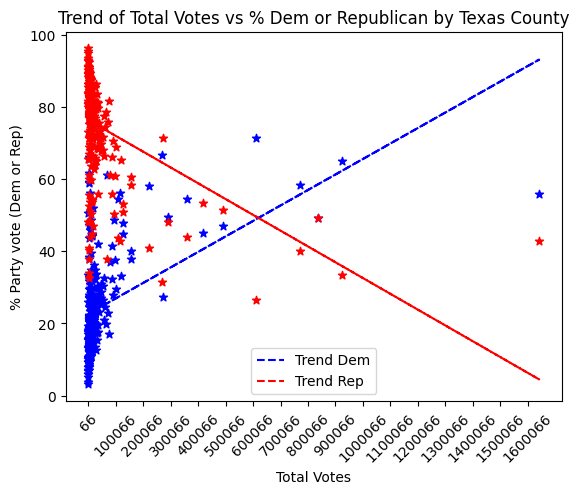

count        254.00
mean       44587.74
std       151202.67
min           66.00
25%         2341.50
50%         7715.00
75%        22714.75
max      1641257.00
Name: Total Votes, dtype: object

In [6]:
import numpy as np
from matplotlib import pyplot as plt

total_votes = final_data["Total Votes"]
perct_dem = final_data["% Democrat (Biden)"]
perct_rep = final_data["% Republican (Trump)"]

plt.scatter(total_votes, perct_dem, color='blue', marker="*")
plt.scatter(total_votes, perct_rep, color='red', marker="*")

# Fit and plot trendlines for Democrat votes
coefficients_dem = np.polyfit(total_votes, perct_dem, 1)
trendline_dem = np.polyval(coefficients_dem, total_votes)
plt.plot(total_votes, trendline_dem, color='blue', linestyle='--', label='Trend Dem')

# Fit and plot trendlines for Republican votes
coefficients_rep = np.polyfit(total_votes, perct_rep, 1)
trendline_rep = np.polyval(coefficients_rep, total_votes)
plt.plot(total_votes, trendline_rep, color='red', linestyle='--', label='Trend Rep')

# Set the title and labels
plt.title('Trend of Total Votes vs % Dem or Republican by Texas County')
plt.xlabel('Total Votes')
plt.ylabel('% Party vote (Dem or Rep)')

plt.ticklabel_format(scilimits=(-5, 8)) #https://stackoverflow.com/questions/28371674/prevent-scientific-notation#:~:text=The%20most%20convenient%20way%20is,ticklabel_format%20).&text=Another%20way%20to%20prevent%20scientific,used%20using%20the%20scilimits%3D%20parameter.

# Set x-axis ticks based on total_votes
tick_interval = 100000
tick_positions = np.arange(total_votes.min(), total_votes.max(), step=tick_interval)
plt.xticks(tick_positions, rotation=45)

plt.legend()
plt.show()

final_data["Total Votes"].describe().apply(lambda x: format(x, '.2f')) #Print results not in scientific notation https://stackoverflow.com/questions/40347689/dataframe-describe-suppress-scientific-notation

What this plot tells us is that the larger counties typically voted more for the democratic candidate while smaller counties with less total votes voted more for the republican candidate. As population increases, the % votes for democrats went up while % votes for republicans went down.